<a href="https://colab.research.google.com/github/look4pritam/ArtificialIntelligence/blob/master/Applications/Notebooks/SentimentAnalysis/CNN-RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis
In this assignment, we will learn to create neural network model for [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) using [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) and [recurrent neural network](https://en.wikipedia.org/wiki/Recurrent_neural_network) approach. 

### Import required python modules.

In [1]:
import numpy as np
np.random.seed(7)

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

### Load the IMDb dataset.

Keras has a built-in [IMDb movie reviews dataset](https://keras.io/datasets). We will use this dataset.
- Set vocabulary size = 5000.
- Set embedding size = 32.
- Load IMDb dataset.

### Hints
- [IMDb movie reviews dataset](https://keras.io/datasets)

In [3]:
vocabulary_size = 5000
embedding_size=32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print('Loaded IMDB dataset with {} training samples and {} test samples.'.format(len(X_train), len(X_test)))

17464789/17464789 [==============================] - 0s 0us/step
Loaded IMDB dataset with 25000 training samples and 25000 test samples.


In [4]:
sample_index = np.random.randint(0, X_train.shape[0])

print('Review ', X_train[sample_index])
print('Label ', y_train[sample_index])

Review  [1, 4002, 24, 6, 78, 96, 8, 380, 12, 13, 197, 14, 16, 204, 21, 95, 13, 1957, 12, 16, 6, 2, 7, 4, 2, 1034, 7, 711, 1991, 13, 115, 219, 711, 1991, 366, 13, 16, 1119, 13, 219, 14, 22, 54, 13, 16, 790, 4, 598, 2, 2, 228, 80, 79, 1571, 11, 129, 419, 24, 8, 760, 4, 598, 756, 613, 34, 4, 2, 14, 9, 4, 249, 1664, 302, 207, 126, 110, 33, 4, 172, 58, 14, 22, 1287, 6, 3942, 2, 7, 503, 102, 906, 4414, 193, 6, 2, 5, 140, 8, 1445, 276, 4, 2, 11, 129, 2, 5, 25, 28, 2, 671, 13, 377, 319, 14, 22, 23, 20, 2, 2, 34, 3584, 50, 9, 31, 136, 121, 12, 16, 40, 711, 1991, 11, 2, 11, 711, 1991, 29, 2, 4, 250, 5, 2, 56, 4, 1430, 21, 11, 14, 22, 29, 2, 180, 4, 1430, 5, 2, 4, 250, 37, 16, 1454, 82, 187, 15, 291, 16, 160, 1991, 2, 4887, 2, 132, 2, 63, 385, 39, 2579, 1991, 50, 9, 6, 176, 7, 4286, 2, 139, 5, 2, 648, 531, 14, 22, 80, 563, 25, 1104, 12, 9, 40, 13, 301, 43, 160, 711, 1991, 2, 1150, 3245, 18, 567, 1101, 2, 791, 5, 49, 629, 139]
Label  0


In [5]:
word_to_identifier = imdb.get_word_index()
identifier_to_word = {i: word for word, i in word_to_identifier.items()}

print('Review with words' , [identifier_to_word.get(i, ' ') for i in X_train[sample_index]])
print('Label ' , y_train[sample_index])

1641221/1641221 [==============================] - 0s 0us/step
Review with words ['the', 'staff', 'his', 'is', 'do', 'too', 'in', 'sex', 'that', 'was', 'between', 'as', 'with', "i've", 'not', 'them', 'was', 'unfunny', 'that', 'with', 'is', 'and', 'br', 'of', 'and', 'further', 'br', 'easily', 'gags', 'was', 'best', 'least', 'easily', 'gags', 'friends', 'was', 'with', 'italian', 'was', 'least', 'as', 'you', 'no', 'was', 'with', 'among', 'of', 'complete', 'and', 'and', 'making', 'into', 'also', 'seconds', 'this', 'man', 'yes', 'his', 'in', 'add', 'of', 'complete', 'stand', 'annoying', 'who', 'of', 'and', 'as', 'it', 'of', 'sure', 'teenage', 'instead', 'always', 'your', 'life', 'they', 'of', 'every', 'my', 'as', 'you', 'comedies', 'is', 'pretend', 'and', 'br', 'child', 'characters', 'meet', 'celebrity', 'long', 'is', 'and', 'to', 'through', 'in', 'happening', 'maybe', 'of', 'and', 'this', 'man', 'and', 'to', 'have', 'one', 'and', 'important', 'was', 'start', 'wife', 'as', 'you', 'are', 'on

In [6]:
print('Maximum review length: {}'.format(len(max((X_train + X_test), key=len))))
print('Minimum review length: {}'.format(len(min((X_test + X_test), key=len))))

Maximum review length: 2697
Minimum review length: 14


### Pad sequences

In order to feed this data into our neural network model, all input documents must have the same length. We will limit the maximum review length to max_words is equal to 500 by truncating longer reviews and padding shorter reviews with a null value (0). We can accomplish this using the [pad_sequences(...)](https://keras.io/preprocessing/sequence/) function in Keras. 


### Hints
- [pad_sequences()](https://keras.io/preprocessing/sequence/)

In [7]:
from tensorflow.keras.preprocessing import sequence

max_words = 500

X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [8]:
validation_size = 1000

X_val, y_val = X_train[:validation_size], y_train[:validation_size]
X_train, y_train = X_train[validation_size:], y_train[validation_size:]

### Use Adam optimizer.

*   Import Adam optimizer from keras optimizers. See [link](https://keras.io/optimizers/) for details.
*   Create an object of Adam optimizer with learning rate  value 0.001.

In [9]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

### Import required python modules.

In [10]:
from matplotlib import pyplot

def show_graph(history):  
    pyplot.plot(history.history['accuracy'])
    pyplot.plot(history.history['val_accuracy'])
    pyplot.title('Model accuracy')
    pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epoch')
    pyplot.legend(['Train', 'Validation'], loc='upper left')
    pyplot.show()

    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('Model loss')
    pyplot.ylabel('Loss')
    pyplot.xlabel('Epoch')
    pyplot.legend(['Train', 'Validation'], loc='upper left')
    pyplot.show()

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense

### Create a simple recurrent neural network model using Keras.

1. Create a sequential model. See [link](https://keras.io/models/sequential/) for details.

2. Add an embedding layer to the model. See [link](https://keras.io/layers/embeddings) for more details.
Set input_dim = vocabulary_size, output_dim = embedding_size and input_length = max_words.

3. Add a dropout layer to the model. See [link](https://keras.io/layers/core/) for details. Set rate = 0.25 for the layer.

4. Add a convolutional 1D layer to the model. See [link](https://keras.io/layers/convolutional/) for more details.
Set filters = 64, kernel size = 5, padding = same, activation = relu for the layer.

5. Add a max pooling 1D layer to the model. See [link](https://keras.io/layers/pooling/) for details. Set pool size = 2 for the layer.

6. Add a GRU layer to the model. See [link](https://keras.io/layers/recurrent/) for more details.
Set units = 128 for the layer.

7. Add a dense layer to the model. Set units = 1, activation = sigmoid for the layer.

In [12]:
cnn_rnn_model = Sequential()
cnn_rnn_model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
cnn_rnn_model.add(Dropout(0.25))

cnn_rnn_model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
cnn_rnn_model.add(MaxPooling1D(pool_size=2))

cnn_rnn_model.add(GRU(units=128))
cnn_rnn_model.add(Dense(units=1, activation='sigmoid'))

### Compile the simple recurrent neural network model.

1. See [link](https://keras.io/models/model/) for details.
2. Set loss = binary_crossentropy.
3. Set optimizer=optimizer (created Adam optimizer).
4. Set metrics = accuracy.
5. Print model summary for visualization.

In [13]:
cnn_rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn_rnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 dropout (Dropout)           (None, 500, 32)           0         
                                                                 
 conv1d (Conv1D)             (None, 500, 64)           10304     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 64)          0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 128)               74496     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                        

### Train the simple recurrent neural network model.

1. Set number of epochs between 1-2.
2. Set batch size as multiple of 32 i.e. either 32 or 64.
3.  Call function fit(...) on the model. 
4.  See [link](https://keras.io/models/model/) for details.
5. Pass X_train and y_train for training the model
6. Pass X_val and y_val as validation data.

In [14]:
batch_size = 32
num_epochs = 2

Epoch 1/2
750/750 [==============================] - 96s 111ms/step - loss: 0.4243 - accuracy: 0.7910 - val_loss: 0.2648 - val_accuracy: 0.8940
Epoch 2/2
750/750 [==============================] - 26s 34ms/step - loss: 0.2458 - accuracy: 0.9028 - val_loss: 0.2929 - val_accuracy: 0.8810


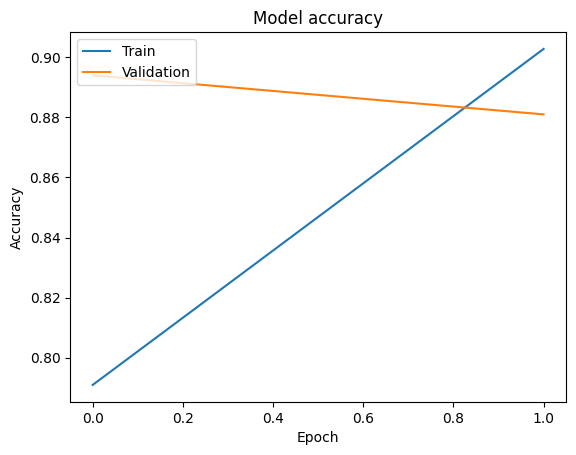

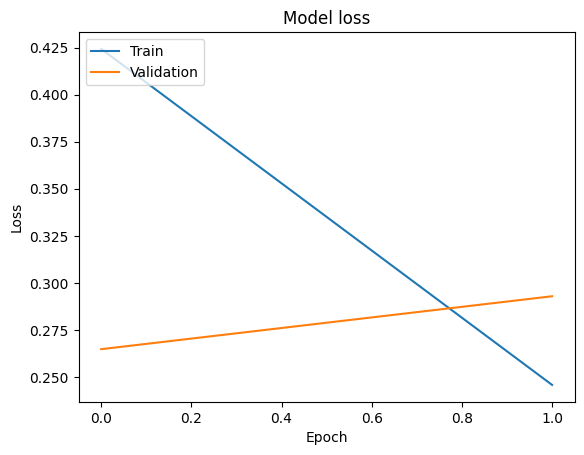

In [15]:
history = cnn_rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=num_epochs)
show_graph(history)

### Print the model accuracy.

In [16]:
scores = cnn_rnn_model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1]*100.0)

Test accuracy: 87.2439980506897


**Expected Output**:

<table>
    <tr>
        <td>
            Test accuracy
        </td>
        <td>
           between 75.0 and 95.0
        </td>
    </tr>
</table>